#Real Valued Data and the Normal Inverse-Wishart Distribution

---

##One of the most common forms of data is real valued data

Let's set up our environment and consider an example dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('talk')
sns.set_style('darkgrid')

###The [Iris Flower Dataset](https://archive.ics.uci.edu/ml/datasets/Iris) is a standard machine learning data set dating back to the 1930s.  It contains measurements from 150 flowers, 50 from each of the following species:

- Iris Setosa
- Iris Versicolor
- Iris Virginica

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###In the case of the `iris` dataset, plotting the data shows that indiviudal species exhibit a typical range of measurements

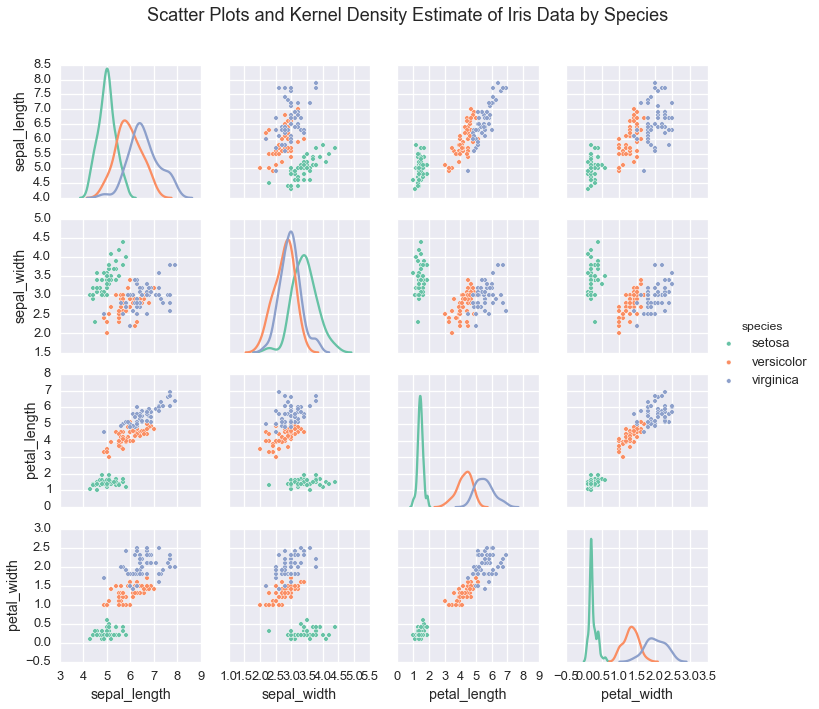

In [3]:
irisplot = sns.pairplot(iris, hue="species", palette='Set2', diag_kind="kde", size=2.5)
irisplot.fig.suptitle('Scatter Plots and Kernel Density Estimate of Iris Data by Species', fontsize = 18)
irisplot.fig.subplots_adjust(top=.9)

If we wanted to learn these underlying species' measurements, we would use these real valued measurements and make assumptions about the structure of the data. 

##In practice, real valued data is commonly assumed to be distributed normally, or Gaussian

We could assume that conditioned on `species`, the measurement data follwed a multivariate normal 

###$$P(\mathbf{x}|species=s)\sim\mathcal{N}(\mu_{s},\Sigma_{s})$$

The normal inverse-Wishart distribution allows us to learn the underlying parameters of each normal distribution, its mean $\mu_s$ and its covariance $\Sigma_s$.  Since the normal inverse-Wishart is the conjugate prior of the multivariate normal, the posterior distribution of a multivariate normal with a normal inverse-Wishart prior also follows a normal inverse-Wishart distribution.  This allows us to infer the distirbution over values of $\mu_s$ and  $\Sigma_{s}$ when we define our model.

Note that if we have only one real valued variable, the normal inverse-Wishart distribution is often referred to as the normal inverse-gamma distribution.  In this case, we learn the scalar valued mean $\mu$ and variance $\sigma^2$ for each inferred cluster.

---

##To specify the joint distribution of a multivariate normal inverse-Wishart distribution, we would import our likelihood model

In [4]:
from microscopes.models import niw as normal_inverse_wishart